# EDA

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from functions import correlation_plot, jitter

## Load Data

In [2]:
wine_path_red='../0. Project Data/Processed Data/1. no_duplicates/no_duplicates_red.csv'
wine_path_white='../0. Project Data/Processed Data/1. no_duplicates/no_duplicates_white.csv'
r_df=pd.read_csv(wine_path_red, sep=',')
w_df=pd.read_csv(wine_path_white, sep=',')
df=pd.concat([r_df,w_df])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 3960
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  wine_type             5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df['quality'].value_counts()

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

## Exploratory Data Analysis

The units for each of the features is contained in Table 1 [Cortez et al., 2009] below. dm<sup>3</sup> represents cubic decimetres and is equivalent to 1 litre.

![title](images/wine_feature_units_table_1.png)

### Data Distribution

#### Distribution of Response Variable

In [6]:
sns.set_style('dark')
sns.set(rc={"axes.facecolor": "gray", "figure.facecolor": "white"})

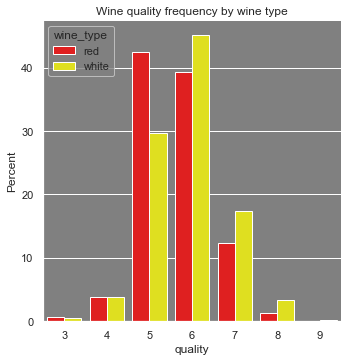

In [7]:
(df
.groupby('wine_type')['quality']
.value_counts(normalize=True)
.mul(100)
.rename('Percent')
.reset_index()
.pipe((sns.catplot,'data'), x='quality',y='Percent',hue='wine_type',kind='bar', palette= ['red', 'yellow'], legend_out=False))
plt.title('Wine quality frequency by wine type')
plt.show()

We can see that the majority of high quality wines (6,7,8,9) are white wines while over 40% of red wines were rated with a quality of 5.

Although the wine quality score can range from 0-10 we do not see any labels from the 0,1,2, or 10 quality classes in our data. We see that the majority of wines have a quality of 5, 6, or 7. 

#### Boxplot of Wine Quality vs Features by Wine Type

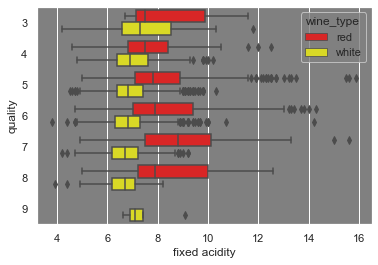

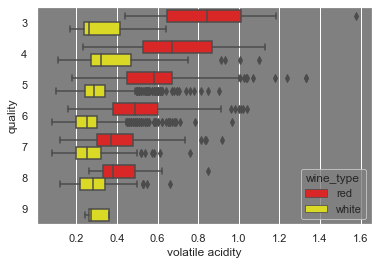

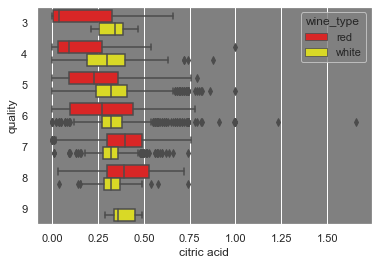

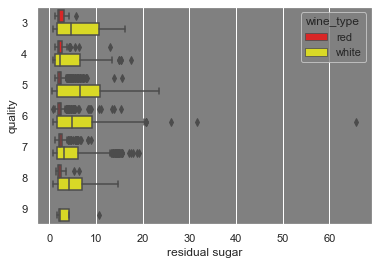

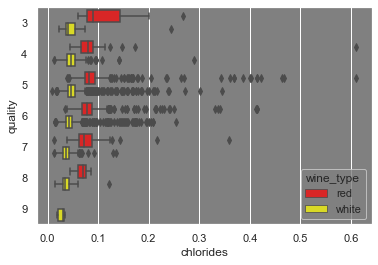

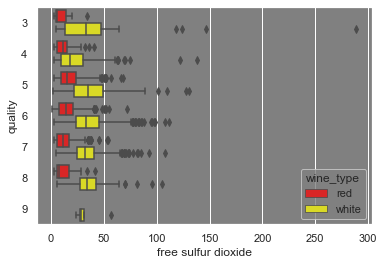

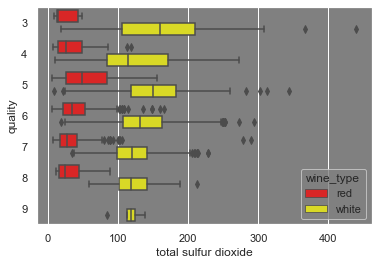

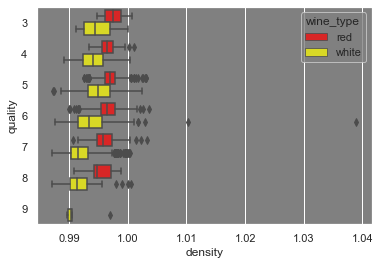

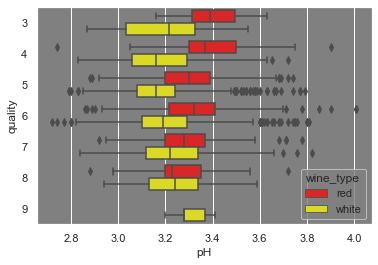

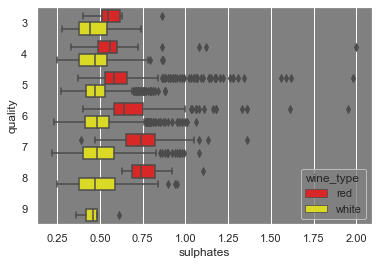

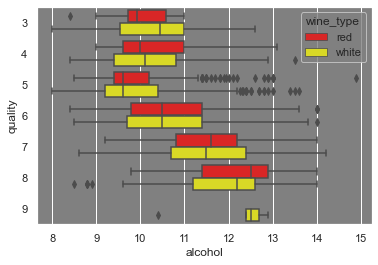

In [8]:
for feature in df.columns:
    if feature=='quality' or feature =='wine_type':
        continue
    sns.boxplot(data=df, x=feature, y=df['quality'].astype('category'), hue='wine_type', palette=['Red', 'Yellow'], saturation=.7)
    plt.show()

##### From these box plots, some trends are easily noticeable.

Red wines tend to have less citric acid and more chlorides.

White wines tend to have more residual sugar and less suphates.

Higher rated wines tend to have more alcohol content, less total suphur dioxide and less volatile acidity.

#### Distribution of Explanatory Variables

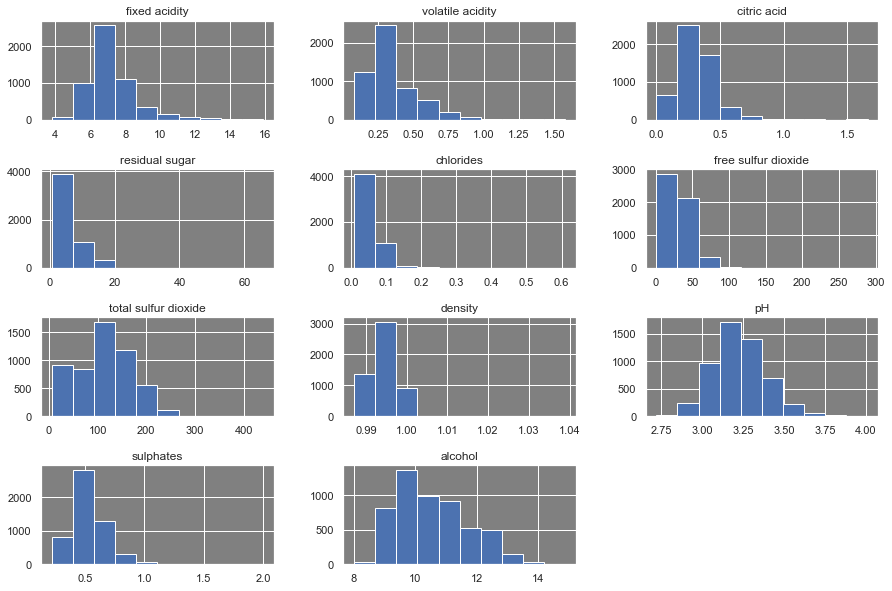

In [9]:
df.drop(columns='quality').hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

We can see that most of these features are not normally distributed rather most have long tails. This can mean we have outliers. Another consideration is if we are scaling our features in preprocessing, RobustScaler should be used over StandardScaler as RobustScaler is robust to outliers while StandardScaler is preferential when data is normally distributed.

Using domain knowledge, we know that pH is on a scale from 0-14. There seems to be no outliers or obvious errors in pH. Wine is mostly made of water so a density centered around 1 g/cm<sup>3</sup> makes sense. The features residual sugar, chlorides, free sulfur dioxide, and density look like there could be outliers present.

Total sulfur dioxide is the sum of free sulfur dioxide and bound sulfur dioxide. We should check for rows where there is more free sulfur dioxide than total sulfur dioxide as this would be a sign of bad data.

In [10]:
df[df['total sulfur dioxide'].sub(df['free sulfur dioxide'])<0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type


There doesn't seem to be any obvious errors.

#### Correlation Heatmap

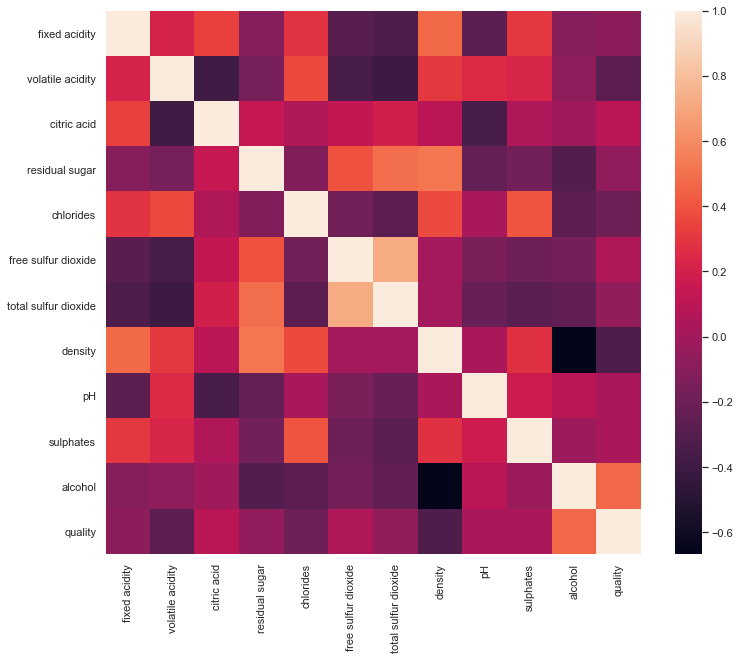

In [11]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

#### Feature Scatterplots

Some of the features seem to be highly correlated, we can check their scatter plots:

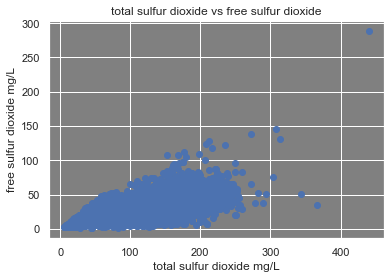

In [12]:
correlation_plot(df, 'total sulfur dioxide', 'free sulfur dioxide', 'mg/L', 'mg/L')

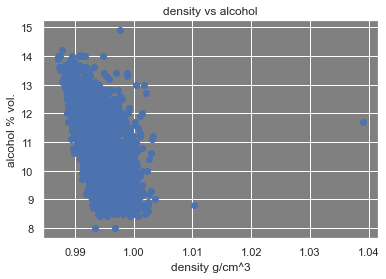

In [13]:
correlation_plot(df, 'density', 'alcohol', 'g/cm^3', '% vol.')

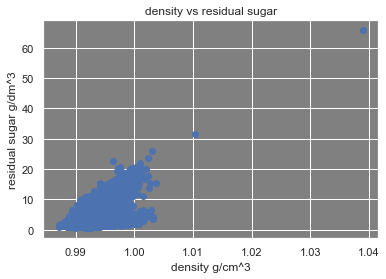

In [14]:
correlation_plot(df, 'density', 'residual sugar', 'g/cm^3', 'g/dm^3')

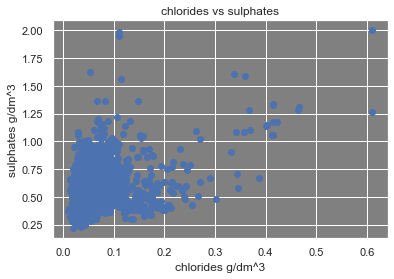

In [15]:
correlation_plot(df, 'chlorides', 'sulphates', 'g/dm^3', 'g/dm^3')